In [238]:
%matplotlib inline
from pandas import *
from pylab import *
import pandas
import numpy as np
import matplotlib.pyplot as plt

def side_by_side(*objs, **kwds):
    from pandas.core.common import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print adjoin(space, *reprs)

plt.rc('figure', figsize=(10, 6))
# pandas.set_printoptions(notebook_repr_html=False)

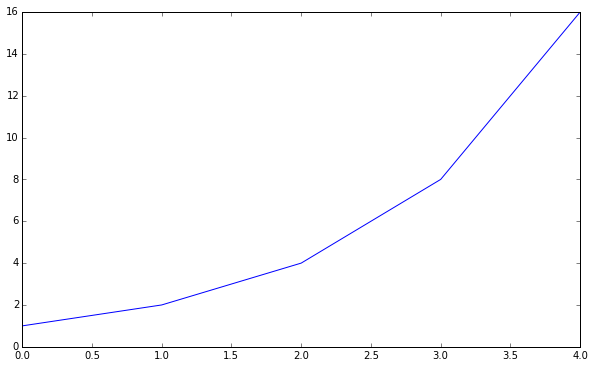

In [239]:
plt.plot([1,2,4,8,16])

Series
======

In [240]:
np.random.randn(5)

array([-1.57645661, -1.06105658, -0.30084816,  1.18257536,  1.1565024 ])

In [241]:
labels = ['a', 'b', 'c', 'd', 'e']
s = pd.Series(np.random.randn(5), index=labels)

In [242]:
'b' in s

True

In [243]:
s['b']

1.2037412498357483

In [244]:
s.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

In [245]:
s

a    0.839078
b    1.203741
c    0.646121
d   -1.071580
e   -1.762554
dtype: float64

In [246]:
mapping = s.to_dict()
mapping

{'a': 0.83907829014906943,
 'b': 1.2037412498357483,
 'c': 0.646121426726598,
 'd': -1.071579669367825,
 'e': -1.7625543713212271}

In [247]:
s = pd.Series(mapping, index=['b', 'e', 'a', 'd', 'f'])
s

b    1.203741
e   -1.762554
a    0.839078
d   -1.071580
f         NaN
dtype: float64

In [248]:
notnull(s)

b     True
e     True
a     True
d     True
f    False
dtype: bool

In [249]:
s[notnull(s)]

b    1.203741
e   -1.762554
a    0.839078
d   -1.071580
dtype: float64

In [250]:
s.dropna()

b    1.203741
e   -1.762554
a    0.839078
d   -1.071580
dtype: float64

In [251]:
s * 2

b    2.407482
e   -3.525109
a    1.678157
d   -2.143159
f         NaN
dtype: float64

In [252]:
s[3:]

d   -1.07158
f        NaN
dtype: float64

In [253]:
s[:3]

b    1.203741
e   -1.762554
a    0.839078
dtype: float64

In [254]:
s.index

Index([u'b', u'e', u'a', u'd', u'f'], dtype='object')

DataFrame: 2D collection of Series
==================================

In [255]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)})
df['d'] = range(6)
df

,a,b,c,d
0,2.916355,foo,0.706942,0
1,-0.044456,bar,0.269207,1
2,-0.786022,foo,-0.062019,2
3,-0.342120,bar,0.906730,3
4,0.690885,foo,0.568872,4
5,0.126221,bar,0.102161,5


In [256]:
df['b']    # by column

0    foo
1    bar
2    foo
3    bar
4    foo
5    bar
Name: b, dtype: object

In [257]:
df[:3]

,a,b,c,d
0,2.916355,foo,0.706942,0
1,-0.044456,bar,0.269207,1
2,-0.786022,foo,-0.062019,2


In [258]:
df[:-2]

,a,b,c,d
0,2.916355,foo,0.706942,0
1,-0.044456,bar,0.269207,1
2,-0.786022,foo,-0.062019,2
3,-0.342120,bar,0.906730,3


In [259]:
df[-2:]   # the last 2 rows

,a,b,c,d
4,0.690885,foo,0.568872,4
5,0.126221,bar,0.102161,5


In [260]:
df[['a','b']]

,a,b
0,2.916355,foo
1,-0.044456,bar
2,-0.786022,foo
3,-0.342120,bar
4,0.690885,foo
5,0.126221,bar


In [261]:
np.tile(['foo', 'bar'], 3)   # in numpy

array(['foo', 'bar', 'foo', 'bar', 'foo', 'bar'], 
      dtype='|S3')

In [262]:
df.xs(0)   # returning the first row

a     2.916355
b          foo
c    0.7069423
d            0
Name: 0, dtype: object

In [263]:
df.ix[2]    # does equal thing as above. In this case, 3rd row. 

a    -0.7860221
b           foo
c   -0.06201887
d             2
Name: 2, dtype: object

In [264]:
df.ix[2, 'b']

'foo'

In [265]:
timeit df.ix[1]

10000 loops, best of 3: 93.5 µs per loop


In [266]:
df.get_value(2, 'b')

'foo'

In [267]:
timeit df.ix[2, 'b']

The slowest run took 15.17 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.63 µs per loop


In [268]:
timeit df.get_value(2, 'b')

The slowest run took 18.77 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 2.35 µs per loop


In [269]:
df.ix[2:4, 'b']

2    foo
3    bar
4    foo
Name: b, dtype: object

In [270]:
df.ix[2:4, ['b', 'c']]

,b,c
2,foo,-0.062019
3,bar,0.906730
4,foo,0.568872


In [271]:
df.ix[2:4, 'b':'c']   # slices by column - essentially the same as above.

,b,c
2,foo,-0.062019
3,bar,0.906730
4,foo,0.568872


In [272]:
df.ix[2:4, 0:2]

,a,b
2,-0.786022,foo
3,-0.342120,bar
4,0.690885,foo


In [273]:
df.ix[[0, 2, 4], ['b', 'c', 'd']]   # pass a list of rows and columns I want to select out

,b,c,d
0,foo,0.706942,0
2,foo,-0.062019,2
4,foo,0.568872,4


In [274]:
df['c'] > 0

0     True
1     True
2    False
3     True
4     True
5     True
Name: c, dtype: bool

In [275]:
df.ix[df['c'] > 0]   # boolean arrays

,a,b,c,d
0,2.916355,foo,0.706942,0
1,-0.044456,bar,0.269207,1
3,-0.342120,bar,0.906730,3
4,0.690885,foo,0.568872,4
5,0.126221,bar,0.102161,5


In [276]:
df.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [277]:
df.columns

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [278]:
pandas.date_range('1/1/2000',periods=6)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [279]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               index=pandas.date_range('1/1/2000', periods=6))
df

,a,b,c
2000-01-01,-0.162276,foo,0.856460
2000-01-02,1.511038,bar,0.248018
2000-01-03,0.573533,foo,0.351201
2000-01-04,1.480528,bar,0.094763
2000-01-05,0.696968,foo,-1.092362
2000-01-06,2.197653,bar,-0.122355


In [280]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-0.243970,foo,-0.830845,NaN
1,-1.298396,bar,0.894550,NaN
2,-1.605180,foo,0.111854,NaN
3,1.007915,bar,-1.215418,NaN
4,-0.481329,foo,0.650115,NaN
5,1.536801,bar,-0.232460,NaN


In [281]:
isnull(df)

,a,b,c,d
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,False,False,False,True


Creation from nested dicts
--------------------------

These arise naturally in Python code

In [282]:
data = {}
for col in ['foo', 'bar', 'baz']:
    for row in ['a', 'b', 'c', 'd']:
        data.setdefault(col, {})[row] = np.random.randn()   # sorted cols: bar, baz, foo
data

{'bar': {'a': -0.5831719966122965,
  'b': 1.8343474619038946,
  'c': -0.12740074407932733,
  'd': 0.7331027755440939},
 'baz': {'a': -1.343980035483456,
  'b': 1.1671850222788172,
  'c': -0.5309376885848905,
  'd': -1.5973280334151108},
 'foo': {'a': 0.4128328172002056,
  'b': 0.5057106816734702,
  'c': 0.35784654735496674,
  'd': 0.14985910549380382}}

In [283]:
del data ['foo']['c']   # delete an entry by index key (col) and row.

In [284]:
DataFrame(data)   # pass a dict 

,bar,baz,foo
a,-0.583172,-1.343980,0.412833
b,1.834347,1.167185,0.505711
c,-0.127401,-0.530938,NaN
d,0.733103,-1.597328,0.149859


Data alignment
==============

In [285]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=True)

In [286]:
!head -n 10 stock_data.csv

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29 00:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30 00:00:00,36.43,187.0,34.39,106.15,56.99,32.7,65.8,1531.02,83.25
2007-10-31 00:00:00,36.79,189.95,34.97,108.01,57.3,33.84,65.69,1549.38,84.03
2007-11-01 00:00:00,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02 00:00:00,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05 00:00:00,35.22,186.18,34.15,105.48,56.7,33.77,64.84,1502.17,80.07
2007-11-06 00:00:00,35.84,191.79,34.14,105.27,56.8,33.47,65.49,1520.27,82.56
2007-11-07 00:00:00,34.76,186.3,33.2,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08 00:00:00,35.0,175.47,33.15,99.05,56.79,31.94,65.5,1474.77,82.0


In [287]:
!head  stock_data.csv

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29 00:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30 00:00:00,36.43,187.0,34.39,106.15,56.99,32.7,65.8,1531.02,83.25
2007-10-31 00:00:00,36.79,189.95,34.97,108.01,57.3,33.84,65.69,1549.38,84.03
2007-11-01 00:00:00,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02 00:00:00,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05 00:00:00,35.22,186.18,34.15,105.48,56.7,33.77,64.84,1502.17,80.07
2007-11-06 00:00:00,35.84,191.79,34.14,105.27,56.8,33.47,65.49,1520.27,82.56
2007-11-07 00:00:00,34.76,186.3,33.2,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08 00:00:00,35.0,175.47,33.15,99.05,56.79,31.94,65.5,1474.77,82.0


In [288]:
close_px

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07
2007-11-06,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56
2007-11-07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00
2007-11-09,34.47,165.37,32.61,93.58,57.29,31.01,65.48,1453.70,79.64


In [289]:
s1 = close_px['AAPL'][-20:]      # the last 20 rows
s2 = close_px['AAPL'][-25:-10]   # the last 25 - last 10 = 15 rows.
side_by_side(s1, s2)

2011-09-19    411.63          2011-09-12    379.94      
2011-09-20    413.45          2011-09-13    384.62      
2011-09-21    412.14          2011-09-14    389.30      
2011-09-22    401.82          2011-09-15    392.96      
2011-09-23    404.30          2011-09-16    400.50      
2011-09-26    403.17          2011-09-19    411.63      
2011-09-27    399.26          2011-09-20    413.45      
2011-09-28    397.01          2011-09-21    412.14      
2011-09-29    390.57          2011-09-22    401.82      
2011-09-30    381.32          2011-09-23    404.30      
2011-10-03    374.60          2011-09-26    403.17      
2011-10-04    372.50          2011-09-27    399.26      
2011-10-05    378.25          2011-09-28    397.01      
2011-10-06    377.37          2011-09-29    390.57      
2011-10-07    369.80          2011-09-30    381.32      
2011-10-10    388.81          Name: AAPL, dtype: float64
2011-10-11    400.29                                    
2011-10-12    402.19           

In [290]:
s1 + s2

2011-09-12       NaN
2011-09-13       NaN
2011-09-14       NaN
2011-09-15       NaN
2011-09-16       NaN
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03       NaN
2011-10-04       NaN
2011-10-05       NaN
2011-10-06       NaN
2011-10-07       NaN
2011-10-10       NaN
2011-10-11       NaN
2011-10-12       NaN
2011-10-13       NaN
2011-10-14       NaN
Name: AAPL, dtype: float64

In [291]:
s1.add(s2, fill_value=0)

2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03    374.60
2011-10-04    372.50
2011-10-05    378.25
2011-10-06    377.37
2011-10-07    369.80
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, dtype: float64

In [292]:
(s1 + s2).dropna()

2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
Name: AAPL, dtype: float64

In [293]:
df = close_px.ix[-10:, :3]
df

,AA,AAPL,GE
2011-10-03,8.90,374.60,14.69
2011-10-04,9.12,372.50,14.86
2011-10-05,9.37,378.25,15.27
2011-10-06,9.88,377.37,15.53
2011-10-07,9.71,369.80,15.50
2011-10-10,10.09,388.81,16.14
2011-10-11,10.30,400.29,16.14
2011-10-12,10.05,402.19,16.40
2011-10-13,10.10,408.43,16.22
2011-10-14,10.26,422.00,16.60


In [294]:
side_by_side(s1.reindex(s2.index), s2)   # align indexes of s1 and s2. Print 2 objects alongside each other.

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [295]:
side_by_side(s1.ix[s2.index], s2)   # same as above, supported in newer version of 0.12 ipython.

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [296]:
b, c  = s1.align(s2, join='inner')
side_by_side(b, c)

2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [297]:
b, c  = s1.align(s2, join='outer')
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
2011-10-03    374.60          2011-10-03       NaN      
2011-10-04    372.50          2011-10-04       NaN      
2011-10-05    378.25          2

b, c  = s1.align(s2, join='right')
side_by_side(b, c)

In [298]:
df = close_px.ix[-10:, ['AAPL', 'IBM', 'MSFT']]
df

,AAPL,IBM,MSFT
2011-10-03,374.60,173.29,24.53
2011-10-04,372.50,174.74,25.34
2011-10-05,378.25,176.85,25.89
2011-10-06,377.37,181.69,26.34
2011-10-07,369.80,182.39,26.25
2011-10-10,388.81,186.62,26.94
2011-10-11,400.29,185.00,27.00
2011-10-12,402.19,186.12,26.96
2011-10-13,408.43,186.82,27.18
2011-10-14,422.00,190.53,27.27


In [299]:
df2 = df.ix[::2, ['IBM', 'MSFT']]
side_by_side(df, df2)

              AAPL     IBM   MSFT                   IBM   MSFT
2011-10-03  374.60  173.29  24.53    2011-10-03  173.29  24.53
2011-10-04  372.50  174.74  25.34    2011-10-05  176.85  25.89
2011-10-05  378.25  176.85  25.89    2011-10-07  182.39  26.25
2011-10-06  377.37  181.69  26.34    2011-10-11  185.00  27.00
2011-10-07  369.80  182.39  26.25    2011-10-13  186.82  27.18
2011-10-10  388.81  186.62  26.94                             
2011-10-11  400.29  185.00  27.00                             
2011-10-12  402.19  186.12  26.96                             
2011-10-13  408.43  186.82  27.18                             
2011-10-14  422.00  190.53  27.27                             


In [300]:
df + df2

,AAPL,IBM,MSFT
2011-10-03,NaN,346.58,49.06
2011-10-04,NaN,NaN,NaN
2011-10-05,NaN,353.70,51.78
2011-10-06,NaN,NaN,NaN
2011-10-07,NaN,364.78,52.50
2011-10-10,NaN,NaN,NaN
2011-10-11,NaN,370.00,54.00
2011-10-12,NaN,NaN,NaN
2011-10-13,NaN,373.64,54.36
2011-10-14,NaN,NaN,NaN


In [301]:
b, c = df.align(df2, join='inner')
side_by_side(b, c) 

               IBM   MSFT                   IBM   MSFT
2011-10-03  173.29  24.53    2011-10-03  173.29  24.53
2011-10-05  176.85  25.89    2011-10-05  176.85  25.89
2011-10-07  182.39  26.25    2011-10-07  182.39  26.25
2011-10-11  185.00  27.00    2011-10-11  185.00  27.00
2011-10-13  186.82  27.18    2011-10-13  186.82  27.18


Transposing: no copy if all columns are same type
-------------------------------------------------

In [302]:
df[:5].T

,2011-10-03 00:00:00,2011-10-04 00:00:00,2011-10-05 00:00:00,2011-10-06 00:00:00,2011-10-07 00:00:00
AAPL,374.60,372.50,378.25,377.37,369.80
IBM,173.29,174.74,176.85,181.69,182.39
MSFT,24.53,25.34,25.89,26.34,26.25


Columns can be any type
-----------------------

In [303]:
n = 10
foo = DataFrame(index=range(n))
foo['floats'] = np.random.randn(n)
foo['ints'] = np.arange(n)
foo['strings'] = ['foo', 'bar'] * (n / 2)
foo['bools'] = foo['floats'] > 0
foo['objects'] = pandas.date_range('1/1/2000', periods=n)
foo

,floats,ints,strings,bools,objects
0,0.338415,0,foo,True,2000-01-01
1,-0.786521,1,bar,False,2000-01-02
2,0.254842,2,foo,True,2000-01-03
3,0.324074,3,bar,True,2000-01-04
4,-0.640157,4,foo,False,2000-01-05
5,-0.510205,5,bar,False,2000-01-06
6,0.051809,6,foo,True,2000-01-07
7,-0.225314,7,bar,False,2000-01-08
8,-0.587520,8,foo,False,2000-01-09
9,-0.052271,9,bar,False,2000-01-10


In [304]:
foo.dtypes

floats            float64
ints                int64
strings            object
bools                bool
objects    datetime64[ns]
dtype: object

N.B. transposing is not roundtrippable in this case (column-oriented data structure)

In [305]:
foo.T.T

,floats,ints,strings,bools,objects
0,0.3384152,0,foo,True,2000-01-01 00:00:00
1,-0.7865207,1,bar,False,2000-01-02 00:00:00
2,0.2548424,2,foo,True,2000-01-03 00:00:00
3,0.3240739,3,bar,True,2000-01-04 00:00:00
4,-0.6401572,4,foo,False,2000-01-05 00:00:00
5,-0.5102054,5,bar,False,2000-01-06 00:00:00
6,0.05180929,6,foo,True,2000-01-07 00:00:00
7,-0.2253145,7,bar,False,2000-01-08 00:00:00
8,-0.5875201,8,foo,False,2000-01-09 00:00:00
9,-0.05227093,9,bar,False,2000-01-10 00:00:00


In [306]:
foo.T.T.dtypes

floats     object
ints       object
strings    object
bools      object
objects    object
dtype: object

Function application
====================

You can apply arbitrary functions to the rows or columns of a DataFrame

In [307]:
df

,AAPL,IBM,MSFT
2011-10-03,374.60,173.29,24.53
2011-10-04,372.50,174.74,25.34
2011-10-05,378.25,176.85,25.89
2011-10-06,377.37,181.69,26.34
2011-10-07,369.80,182.39,26.25
2011-10-10,388.81,186.62,26.94
2011-10-11,400.29,185.00,27.00
2011-10-12,402.19,186.12,26.96
2011-10-13,408.43,186.82,27.18
2011-10-14,422.00,190.53,27.27


In [308]:
df.apply(np.mean)

AAPL    389.424
IBM     182.405
MSFT     26.370
dtype: float64

In [309]:
df.mean()   # same as above.   df.mean? to look up the function usage.

AAPL    389.424
IBM     182.405
MSFT     26.370
dtype: float64

In [310]:
df.mean(1)   # get the mean of the rows based on a column. Also excludes missing data (NaN: not a number).

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

In [311]:
df.mean(1, skipna=False)   # flag skipna: to include NaN. In this data, no NaN.

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

In [312]:
df.apply(np.mean, axis=1)   # same as above.

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

You can get as fancy as you want

In [313]:
close_px    # Output: 1000 rows.

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07
2007-11-06,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56
2007-11-07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00
2007-11-09,34.47,165.37,32.61,93.58,57.29,31.01,65.48,1453.70,79.64


In [314]:
close_px.AAPL   # For easier typing, after dot ., use tab to select the name of the stock.

2007-10-29    185.09
2007-10-30    187.00
2007-10-31    189.95
2007-11-01    187.44
2007-11-02    187.87
2007-11-05    186.18
2007-11-06    191.79
2007-11-07    186.30
2007-11-08    175.47
2007-11-09    165.37
2007-11-12    153.76
2007-11-13    169.96
2007-11-14    166.11
2007-11-15    164.30
2007-11-16    166.39
2007-11-19    163.95
2007-11-20    168.85
2007-11-21    168.46
2007-11-23    171.54
2007-11-26    172.54
2007-11-27    174.81
2007-11-28    180.22
2007-11-29    184.29
2007-11-30    182.22
2007-12-03    178.86
2007-12-04    179.81
2007-12-05    185.50
2007-12-06    189.95
2007-12-07    194.30
2007-12-10    194.21
               ...  
2011-09-02    374.05
2011-09-06    379.74
2011-09-07    383.93
2011-09-08    384.14
2011-09-09    377.48
2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
2011-09-19    411.63
2011-09-20    413.45
2011-09-21    412.14
2011-09-22    401.82
2011-09-23    404.30
2011-09-26    403.17
2011-09-27   

In [315]:
close_px.AAPL.idxmax() # gives index of its maximum value.

Timestamp('2011-10-14 00:00:00')

In [316]:
close_px.AAPL.index[1]

Timestamp('2007-10-30 00:00:00')

In [318]:
#close_px.AAPL.index[close_px.AAPL.argmax()]    # If you are numpy aficionado, does the same thing.

In [319]:
close_px.AA.idxmax()

def peak_date(series):
    return series.idxmax()

In [320]:
close_px.apply(peak_date)

AA     2008-05-19
AAPL   2011-10-14
GE     2007-10-31
IBM    2011-10-14
JNJ    2011-07-07
MSFT   2007-11-01
PEP    2008-01-10
SPX    2007-10-31
XOM    2008-05-20
dtype: datetime64[ns]

In [321]:
for column in close_px:
    print close_px[column].max()

41.86
422.0
34.97
190.53
67.32
34.07
71.25
1549.38
87.48


In [ ]:
def peak_date(series):
    return series.idxmax()    # new method: series.idxmax()
close_px.apply(peak_date, axis=0)

In [ ]:
df.apply(lambda x: x.max())

In [ ]:
df.apply(lambda x: x.max() - x.min()) # np.ptp

In [ ]:
np.log(close_px)

Hierarchical indexing
------------------------

In [ ]:
index = MultiIndex(levels=[['foo', 'bar', 'baz', 'qux'],
                                   ['one', 'two', 'three']],
                           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3, 3],
                                   [0, 1, 2, 0, 1, 1, 2, 0, 1, 2]])
hdf = DataFrame(np.random.randn(10, 3), index=index,
                columns=['A', 'B', 'C'])
hdf

In [ ]:
hdf.ix['foo']

In [ ]:
hdf.ix['foo'] = 0
hdf

In [ ]:
hdf.ix['bar','one']['A']

Stacking and unstacking
-----------------------

In [ ]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(np.random.randn(8, 4), index=index, columns=columns)
df

In [ ]:
df2 = df.ix[[0, 1, 2, 4, 5, 7]]
df2

In [ ]:
df.unstack()['B']

GroupBy
=======

In [ ]:
df = DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                'B' : ['one', 'one', 'two', 'three',
                       'two', 'two', 'one', 'three'],
                'C' : np.random.randn(8),
                'D' : np.random.randn(8)})
df

In [ ]:
for key, group in df.groupby('A'):
    print key
    print group

In [ ]:
df.groupby('A')['C'].describe().T

In [ ]:
df.groupby('A').mean()

In [ ]:
for key, group in df.groupby('A'):
    print key
    print group

In [ ]:
df.groupby(['A', 'B']).mean()

In [323]:
#df.groupby(['A', 'B'], as_index=False).mean()

In [324]:
df.stack()

2011-10-03  AAPL    374.60
            IBM     173.29
            MSFT     24.53
2011-10-04  AAPL    372.50
            IBM     174.74
            MSFT     25.34
2011-10-05  AAPL    378.25
            IBM     176.85
            MSFT     25.89
2011-10-06  AAPL    377.37
            IBM     181.69
            MSFT     26.34
2011-10-07  AAPL    369.80
            IBM     182.39
            MSFT     26.25
2011-10-10  AAPL    388.81
            IBM     186.62
            MSFT     26.94
2011-10-11  AAPL    400.29
            IBM     185.00
            MSFT     27.00
2011-10-12  AAPL    402.19
            IBM     186.12
            MSFT     26.96
2011-10-13  AAPL    408.43
            IBM     186.82
            MSFT     27.18
2011-10-14  AAPL    422.00
            IBM     190.53
            MSFT     27.27
dtype: float64

In [326]:
#df.stack().mean(1).unstack()

In [328]:
#df.groupby(level=1, axis=1).mean()